# Hierarchical Clustering
## Selecting a number of topics in the corpus
Hierarchical clustering is a good way to cluster data when we don't know the number of topics in advance and don't want to use trial and error to figure out a good number. It's less efficient than other methods such as $k$&mdash;means clustering. This notebook generates a dendrogram using the Ward method of agglomerative clustering on the lemmatized, cleaned corpus. This gives some indication about what to choose for $k$ in $k$&mdash;means or LDA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC

from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [2]:
df = pd.read_csv('../assets/data/full_frame_20180710.csv', index_col = 0)

In [3]:
corpus = df['lemmatized_text'].copy()

In [4]:
corpus = corpus.str.lower()

In [5]:
cvec = CountVectorizer()

In [6]:
cvec.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
transformed = cvec.transform(corpus)

In [8]:
transformed.toarray().shape

(15385, 48644)

In [9]:
linkage_matrix = ward(cosine_similarity(transformed))

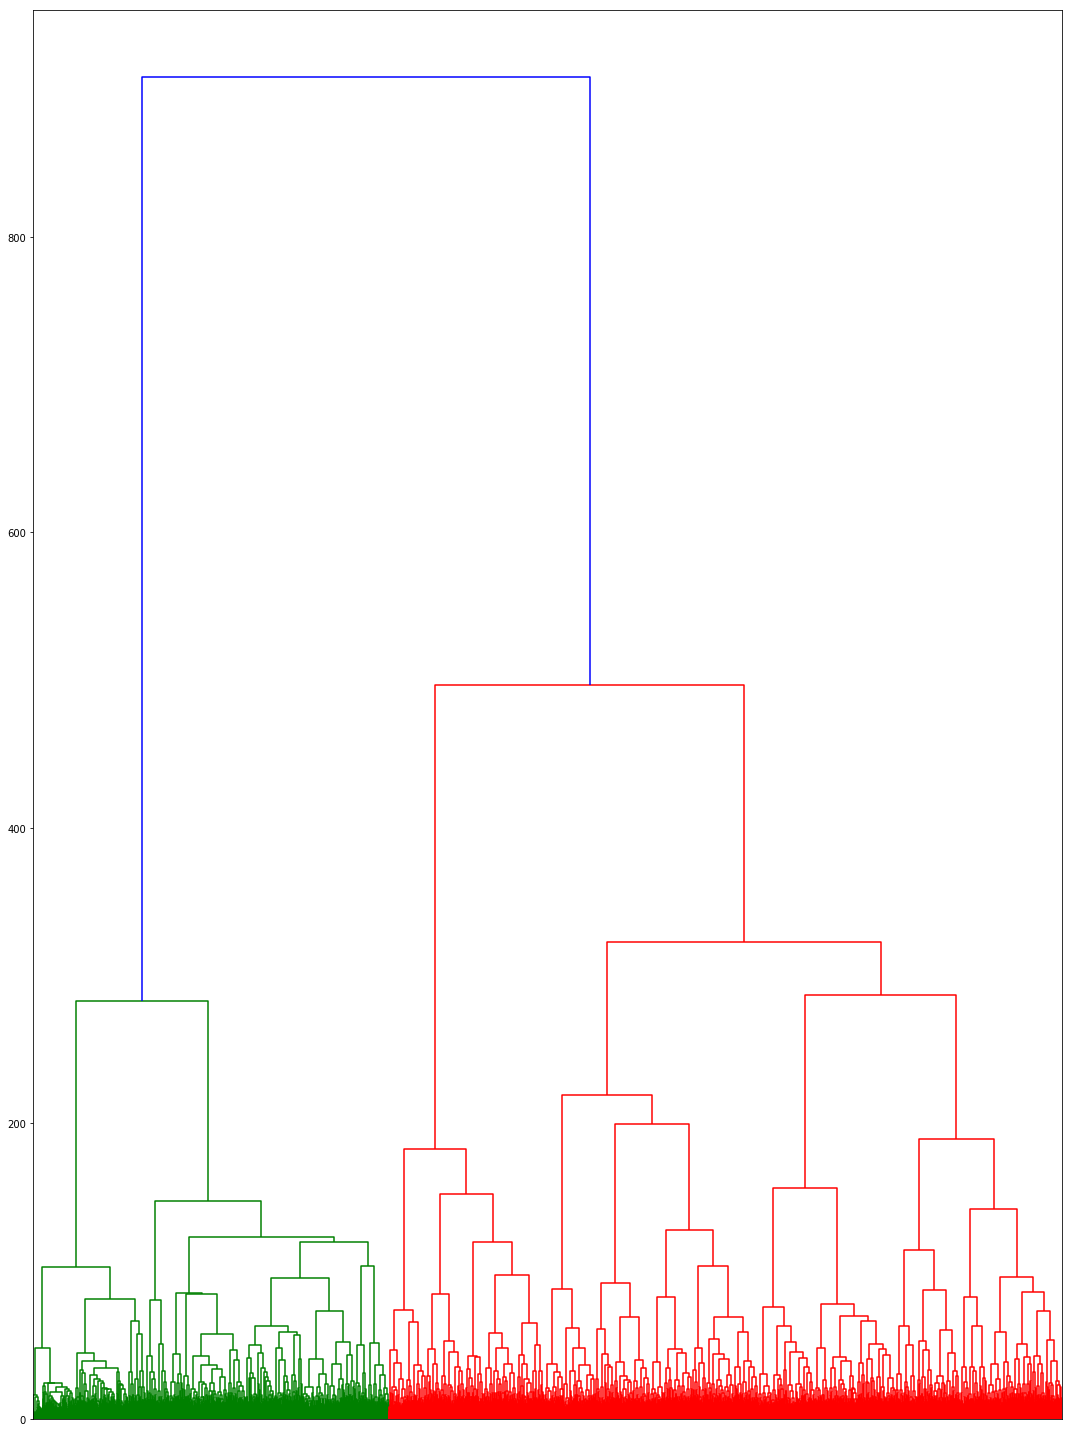

In [10]:
fig, ax = plt.subplots(figsize=(15, 20)) # set size

ax = dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.show()
plt.savefig('../assets/visualizations/ward_clusters.png') #save figure as ward_clusters

In [21]:
plt.savefig('image.png')

In [11]:
df['cluster_2'] = fcluster(linkage_matrix, 600, criterion='distance')

## What are these two classes? What makes them distinct?

In [12]:
print(np.random.choice(df[df['cluster_2']==1].loc[:, 'text']))

kırmızı buğday ayrılmıyor sezinden mevlam mevlam versin güzellerin gencinden kim ayrılmış ben ayrılam eşimden yörü yörü dilber salma saçın sürüsün açıver açıver cepkenini elmas gerdan görünsün dam üstüne kura koymuş ilyeni ben istemem istemem setre pantol giyeni ben isterim mavi şalvar giyeni yörü yörü dilber salma saçın saçın sürüsün açıver açıver cepkenini elmas gerdan görünsün


In [14]:
print(np.random.choice(df[df['cluster_2']==1].loc[:, 'text']))

hu diyelim gerçeklerin demine gerçeklerin demi nurdan sayılır on ikimam katarına uyanlar muhammed aliye yardan sayılır üç gün imiş şu dünyanın safası safasından artık imiş cefası gerçek erenlerin nutku nefesi biri kırktır kırkı birden sayılır


In [15]:
print(np.random.choice(df[df['cluster_2']==1].loc[:, 'text']))

seninle düştüm dile aşkın ban bir çile rakip olur bülbüle göül ah gönül verince güle gonca mısın gül müsün menekşe gözlü müsün manolya yüzlü müsün gönül ah gönülden sözlü müsün


In [17]:
print(np.random.choice(df[df['cluster_2']==2].loc[:, 'text']))

duvar olursun taş olursun uzayıp giden yol olursun gözün görmez engel bilmez kaç gece sabahladığını görmezsen birde üstüne titrersen miden ağrır başın döner gözün görmez engel bilmez kaç gece sabahladığını görmezsen birde üstüne titrersen eyvah eyvah işte buna aşk derler aşk derler aşk derler kıymetini bilemeyenler dert derler acı derler


In [18]:
print(np.random.choice(df[df['cluster_2']==2].loc[:, 'text']))

yıkıla yıkıla yaşayan benim geceler boyunca kahrolan benim ah edip inleyen yıpranan benim kötüysem düşkünsem kime ne bundan hayatım karanlık yerlerde geçer yüreğim kırılmış kadehe benzer yüzüme nefretle bakmayın yeter kötüysem düşkünsem kimene bundan çektiğim çileler kendime benim tutupta birine vurmaz ki elim çekilin üstüme varmayın benim kötüysem düşkünsem kime ne bundan


In [20]:
print(np.random.choice(df[df['cluster_2']==2].loc[:, 'text']))

bir kadeh bir kaç kitap birde sensizlik varsa nasıl yaşar bu yürek umutları olmasa bu sorunu kim çözer diye sorular sorma bu sorunu aşk çözer sadece bizi yorma ah halime gülermisin ağlarmısın şu sevdamdan anlarmısın tek doğrumsun tek yanlışım hem günahım ol sen hemde sevabım


In [25]:
def make_vocab_list(corpus, stopwords = None, ngram_range = (1,1), min_df = 1):
    """Takes a corpus and returns a one column dataframe with words in the index and counts in a column.
    
    Options:
        - stopwords: either a list-like or None (default)
        - ngram_range: a tuple (default (1,1))
        - min_df: minimum document frequency (default 1)"""
    cv = CountVectorizer(stop_words=stopwords, ngram_range=ngram_range, min_df = min_df)
    cv.fit(corpus)
    transformed = cv.transform(corpus)
    
    return pd.DataFrame(pd.DataFrame(transformed.toarray(), columns=cv.get_feature_names()).sum().sort_values(ascending =False), columns = ['count'])


In [52]:
cluster1vocab = make_vocab_list(df[df['cluster_2']==1]['lemmatized_text'])
cluster2vocab = make_vocab_list(df[df['cluster_2']==2]['lemmatized_text'])

cluster1vocab['proportion'] = cluster1vocab['count']/cluster1vocab['count'].sum()
cluster2vocab['proportion'] = cluster2vocab['count']/cluster2vocab['count'].sum()

clustered_vocab = cluster1vocab.merge(cluster2vocab, left_index=True, right_index=True, suffixes = ('_1', '_2'))

clustered_vocab['difference'] = (clustered_vocab['proportion_1']*10000 - clustered_vocab['proportion_2']*10000)

In [53]:
clustered_vocab.sort_values('difference', ascending=False).head(20)

,count_1,proportion_1,count_2,proportion_2,difference
gel,4342,0.013729,6311,0.008900,48.293561
aman,1627,0.005145,852,0.001202,39.430623
oy,1417,0.004481,473,0.000667,38.135255
vay,891,0.002817,243,0.000343,24.746639
yar,2379,0.007522,3715,0.005239,22.833400
biz,1652,0.005224,2238,0.003156,20.675004
dağ,1060,0.003352,950,0.001340,20.119947
kız,879,0.002779,792,0.001117,16.624901
dost,849,0.002685,903,0.001273,14.110914
ay,655,0.002071,590,0.000832,12.390700


In [55]:
clustered_vocab.sort_values('difference', ascending=True).head(20)

,count_1,proportion_1,count_2,proportion_2,difference
ben,3376,0.010675,30393,0.042862,-321.868933
sen,2050,0.006482,17591,0.024808,-183.256509
bir,4345,0.013739,19257,0.027157,-134.183093
ol,3857,0.012196,17141,0.024173,-119.772748
bu,3732,0.011801,11422,0.016108,-43.072827
aşk,1664,0.005262,6206,0.008752,-34.904443
san,1245,0.003937,5241,0.007391,-34.544334
ne,2980,0.009423,8972,0.012653,-32.299953
sev,1910,0.006039,6444,0.009088,-30.482290
de,3280,0.010371,9146,0.012898,-25.267750


For reference, the top most common Turkish words are:
bir
bu 
ve
ne
mi
için
çok
ben
o
evet
de
var
ama
mı
değil
hayır
sen
şey
da
daha
bana
kadar
seni
beni
iyi
onu
tamam
bunu
gibi
yok
benim
her
sana
ki
sadece

Now with more clusters:

In [56]:
df['cluster_3'] = fcluster(linkage_matrix, 400, criterion='distance')

In [60]:
cluster1_3vocab = make_vocab_list(df[df['cluster_3']==1]['lemmatized_text'])
cluster2_3vocab = make_vocab_list(df[df['cluster_3']==2]['lemmatized_text'])
cluster3_3vocab = make_vocab_list(df[df['cluster_3']==3]['lemmatized_text'])

cluster1_3vocab['proportion'] = cluster1_3vocab['count']/cluster1_3vocab['count'].sum()
cluster2_3vocab['proportion'] = cluster2_3vocab['count']/cluster2_3vocab['count'].sum()
cluster3_3vocab['proportion'] = cluster3_3vocab['count']/cluster3_3vocab['count'].sum()

clustered_3vocab = cluster1_3vocab.merge(cluster2_3vocab, left_index=True, right_index=True, suffixes = ('_1', '_2'))
clustered_3vocab = clustered_3vocab.merge(cluster3_3vocab, left_index=True, right_index=True, suffixes = ('_3', ''))

# clustered_vocab['difference'] = (clustered_vocab['proportion_1']*10000 - clustered_vocab['proportion_2']*10000)

In [61]:
clustered_3vocab.head()

,count_1,proportion_1,count_2,proportion_2,count,proportion
bir,4345,0.013739,3725,0.020430,15532,0.029486
gel,4342,0.013729,1665,0.009132,4646,0.008820
ol,3857,0.012196,5295,0.029041,11846,0.022488
bu,3732,0.011801,3288,0.018033,8134,0.015441
ben,3376,0.010675,13115,0.071930,17278,0.032800


In [64]:
clustered_3vocab.columns

Index(['count_1', 'proportion_1', 'count_2', 'proportion_2', 'count',
       'proportion'],
      dtype='object')

In [65]:
clustered_3vocab['difference12'] = (clustered_3vocab['proportion_1']*10000 - clustered_3vocab['proportion_2']*10000)

In [66]:
clustered_3vocab['difference23'] = (clustered_3vocab['proportion_2']*10000 - clustered_3vocab['proportion']*10000)

In [67]:
clustered_3vocab['difference13'] = (clustered_3vocab['proportion_1']*10000 - clustered_3vocab['proportion']*10000)

In [69]:
clustered_3vocab.sort_values('difference12', ascending=False).head(20)

,count_1,proportion_1,count_2,proportion_2,count,proportion,difference12,difference23,difference13
aman,1627,0.005145,97,0.000532,755,0.001433,46.125936,-9.012768,37.113168
gel,4342,0.013729,1665,0.009132,4646,0.008820,45.976265,3.119384,49.095649
oy,1417,0.004481,62,0.000340,411,0.000780,41.405311,-4.401924,37.003387
yar,2379,0.007522,752,0.004124,2963,0.005625,33.980220,-15.005080,18.975140
biz,1652,0.005224,393,0.002155,1845,0.003503,30.682051,-13.470796,17.211254
vay,891,0.002817,45,0.000247,198,0.000376,25.705491,-1.290740,24.414751
dağ,1060,0.003352,158,0.000867,792,0.001504,24.851709,-6.369571,18.482138
kız,879,0.002779,181,0.000993,611,0.001160,17.867005,-1.672034,16.194971
dost,849,0.002685,227,0.001245,676,0.001283,14.395489,-0.383074,14.012415
ay,655,0.002071,135,0.000740,455,0.000864,13.307003,-1.233463,12.073540


In [70]:
clustered_3vocab.sort_values('difference23', ascending=False).head(20)

,count_1,proportion_1,count_2,proportion_2,count,proportion,difference12,difference23,difference13
ben,3376,0.010675,13115,0.071930,17278,0.032800,-612.554477,391.300819,-221.253658
sen,2050,0.006482,6274,0.034410,11317,0.021484,-279.281927,129.262792,-150.019136
ol,3857,0.012196,5295,0.029041,11846,0.022488,-168.450164,65.526179,-102.923985
sev,1910,0.006039,2053,0.011260,4391,0.008336,-52.204161,29.240484,-22.963678
bu,3732,0.011801,3288,0.018033,8134,0.015441,-62.326941,25.918560,-36.408381
san,1245,0.003937,1688,0.009258,3553,0.006745,-53.212806,25.130209,-28.082597
aşk,1664,0.005262,1829,0.010031,4377,0.008309,-47.697235,17.220774,-30.476461
seni,1738,0.005496,1523,0.008353,3681,0.006988,-28.574495,13.650698,-14.923797
bırak,374,0.001183,556,0.003049,1010,0.001917,-18.668389,11.320618,-7.347771
ne,2980,0.009423,2456,0.013470,6516,0.012370,-40.473499,11.002663,-29.470836


In [71]:
clustered_3vocab.sort_values('difference13', ascending=False).head(20)

,count_1,proportion_1,count_2,proportion_2,count,proportion,difference12,difference23,difference13
gel,4342,0.013729,1665,0.009132,4646,0.008820,45.976265,3.119384,49.095649
aman,1627,0.005145,97,0.000532,755,0.001433,46.125936,-9.012768,37.113168
oy,1417,0.004481,62,0.000340,411,0.000780,41.405311,-4.401924,37.003387
vay,891,0.002817,45,0.000247,198,0.000376,25.705491,-1.290740,24.414751
yar,2379,0.007522,752,0.004124,2963,0.005625,33.980220,-15.005080,18.975140
dağ,1060,0.003352,158,0.000867,792,0.001504,24.851709,-6.369571,18.482138
biz,1652,0.005224,393,0.002155,1845,0.003503,30.682051,-13.470796,17.211254
kız,879,0.002779,181,0.000993,611,0.001160,17.867005,-1.672034,16.194971
dost,849,0.002685,227,0.001245,676,0.001283,14.395489,-0.383074,14.012415
ay,655,0.002071,135,0.000740,455,0.000864,13.307003,-1.233463,12.073540
